In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('titanic.csv')
"""
Описание датасета.
Данный датасет взят с открытого источника Github (https://github.com/awesomedata/awesome-public-datasets).
Это имитационные данные предназначенные для тренировки в решении задач машинного обучения.

Описание атрибутов датасета.
В выбранном датасете представлены следующие атрибуты:
•	PassengerId – порядковый номер пассажира в датасете; числовой тип.
•	Survived – атрибут, который показывает выжил пассажир или нет; числовой тип, имеет два значения (0/1).
•	Pclass – атрибут, который содержит класс, которым следовал пассажир; числовой тип, имеет 3 значения (1, 2, 3).
•	Name – атрибут, содержащий имя пассажира; строковый тип.
•	Sex – атрибут, содержащий пол пассажира; строковый тип, имеет два значения (male/female).
•	Age – атрибут, содержащий возраст пассажира; числовой тип.
•	SibSp – число братьев, сестер или супругов на борту у человека; числовой тип.
•	Parch – количество родителей или детей, с которыми путешествовал каждый пассажир; числовой тип.
•	Ticket – атрибут, содержащий билет пассажира; строковый тип.
•	Fare – атрибут, содержащий стоимость тарифа; числовой тип.
•	Cabin – атрибут, содержащий каюту пассажира; строковый тип.
•	Embarked – атрибут, содержащий порт посадки пассажира; строковый тип.

В данной работе будут использоваться не все вышеприведенные атрибуты, 
а именно мы будем анализировать атрибуты с числовым типом и один атрибут со строковым типом Sex.

Задача анализа датасета Титаник построить модель, которая сможет предсказать, 
остался ли произвольный пассажир в живых или нет.
"""

#Найдем среднее значения для числовых атрибутов.
df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].mean()


Survived     0.383838
Pclass       2.308642
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
dtype: float64

In [3]:
#Найдем среднеквадратичное отклонение (СКО) для числовых атрибутов.
df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].std()

Survived     0.486592
Pclass       0.836071
Age         14.526497
SibSp        1.102743
Parch        0.806057
Fare        49.693429
dtype: float64

Text(0.5, 1.0, 'Age distribution')

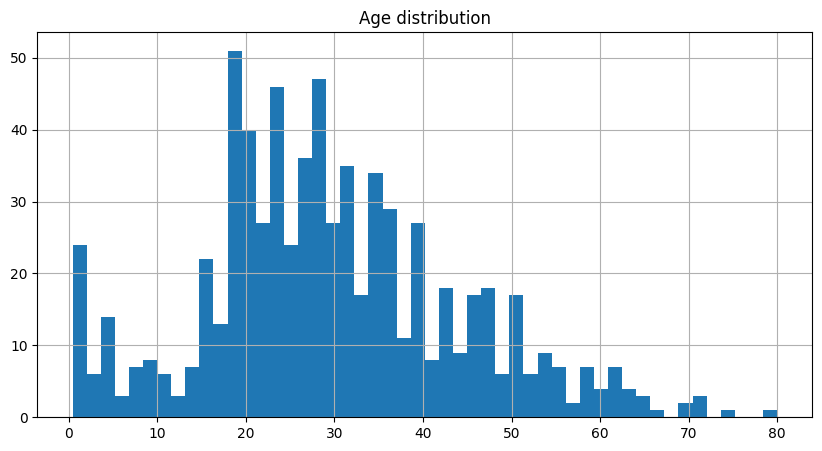

In [27]:
#Построим гистограммы распределения значений для выбранных атрибутов

plt.figure(figsize=(10,5))
plt.hist(df['Age'], bins=50)
plt.grid("True")
plt.title("Age distribution")

"""У данного атрибута выбросов не наблюдается."""

Text(0.5, 1.0, 'Survived distribution')

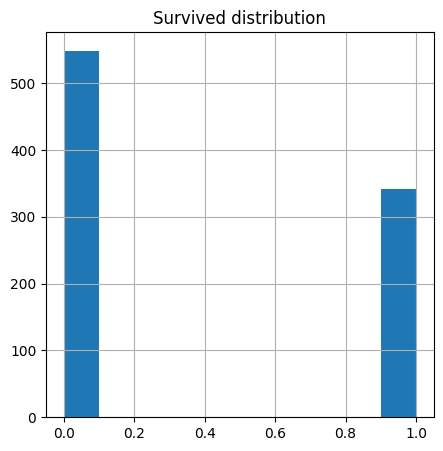

In [12]:
plt.figure(figsize=(5,5))
plt.hist(df['Survived'], bins=10)
plt.grid("True")
plt.title("Survived distribution")

"""Как видно из приведенной диаграммы, выбросов у данного атрибута нет."""

Text(0.5, 1.0, 'Pclass distribution')

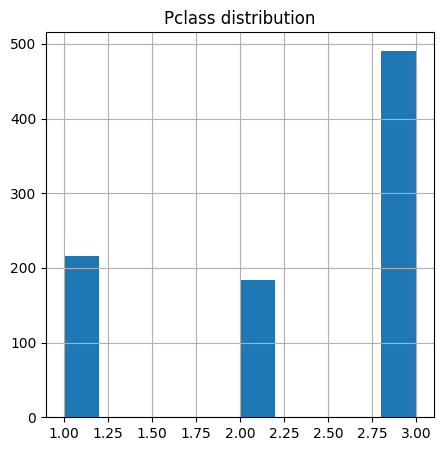

In [17]:
plt.figure(figsize=(5,5))
plt.hist(df['Pclass'], bins=10)
plt.grid("True")
plt.title("Pclass distribution")

"""Как видно из приведенной диаграммы, выбросов у данного атрибута нет."""

Text(0.5, 1.0, 'SibSp distribution')

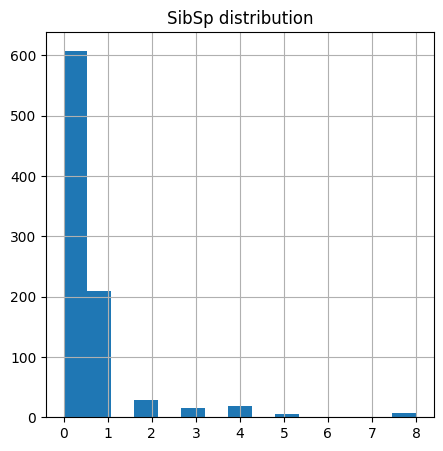

In [20]:
plt.figure(figsize=(5,5))
plt.hist(df['SibSp'], bins=15)
plt.grid("True")
plt.title("SibSp distribution")

"""
По данной диаграмме можно сделать вывод, что 8 - выброс, 
поскольку значения 5 и 6 в данном атрибуте отсутствуют. 
Если найти людей с 8 братьями/сестрами/супругом в датасете, 
то их будет 7-ро. Пропущенных значений в данном атрибуте нет.
Получается, что у каждого из этих пассажиров может быть 
максимум 6 братьев/сестер и еще должно быть 2 супруга, 
что невозможно для европейских людей.
Либо это выброс, либо датасет неполный.
"""

In [11]:
df[(df['SibSp'] == 8)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


Text(0.5, 1.0, 'Parch distribution')

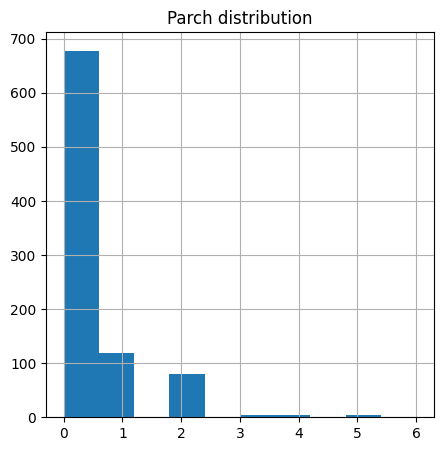

In [21]:
plt.figure(figsize=(5,5))
plt.hist(df['Parch'], bins=10)
plt.grid("True")
plt.title("Parch distribution")

""" Для данного атрибута выбросов не наблюдается."""

Text(0.5, 1.0, 'Fare distribution')

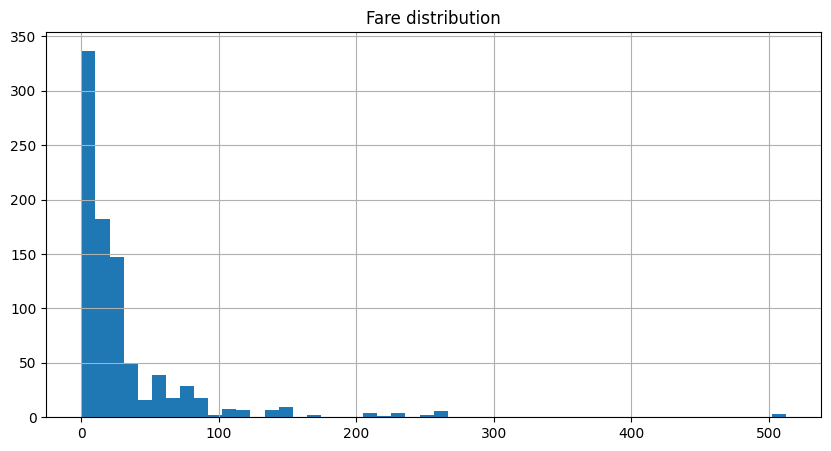

In [23]:
plt.figure(figsize=(10,5))
plt.hist(df['Fare'], bins=50)
plt.grid("True")
plt.title("Fare distribution")

"""Можно предположить, что значения >500 являются выбросом. 
Однако эти люди ехали 1 классом и вполне возможна такая цена."""

In [13]:
df[(df['Fare'] >= 500)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


'У данного атрибута выбросов нет.'

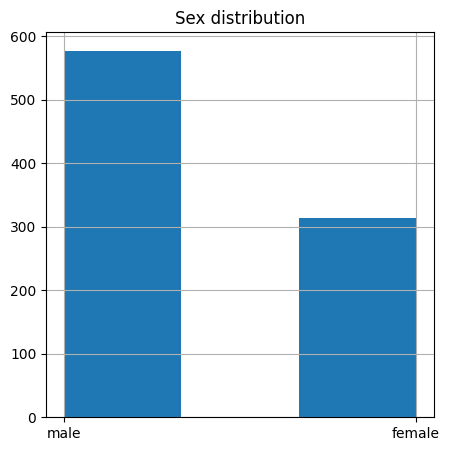

In [23]:
plt.figure(figsize=(5,5))
plt.hist(df['Sex'], bins=3)
plt.grid("True")
plt.title("Sex distribution")

"""У данного атрибута выбросов нет."""

In [22]:
#Найдем пропущенные значения для числовых атрибутов
missing_data = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].isnull()
df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].isnull().sum()

"""Пропущенные значения у рассматриваемых атрибутов, есть только у атрибута Age"""

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [8]:
#Варианты обработки пропущенных значений

"""
 Самые простые способы обработки пропущенных значений следующие:

 -- Если в наборе сравнительно юольшое количество данных, 
    то можно не учитываеть пропущенные значения.
 -- Можно заполнить пропуски нулями.
 -- Можно заменить пропущенные значения выборочным среднем, медианой или модой.
 -- Можно воспользоваться методами интерполяции, такие как линейная интерполяция, 
    для заполнения пропущенных значений на основе соседних значений.

 Первые два способа не особо эффективны. Для наших атрибутов числового типа хорошо подойдут выборочное среднее, медиана
 (значение половина всех значений больше, половина меньше) или мода (наиболее часто встречающая).
""" 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [54]:
#корреляция
df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

"""
Корреляция бывает: положительная и отрицательная.
Если корреляция равна 0, то это говорит о независимости двух величин. 
Чем ближе корреляция к 1 по модулю, тем сильнее зависимость величин.
Положительная корреляция - это связь, при которой увеличение одной переменной связано с увеличением другой переменной.
Отрицательна якорреляция - это связь, при которой увеличение одной переменной влечет уменьшение другой.

Корреляция двух величин может свидетельствовать о существовании общей причины, 
хотя сами явления напрямую не взаимодействуют.

Наибольшая корреляция у Fare и Pclass: -0.549500.
Потом идут: 
    SibSp и Parch: 0.414838 (положительная корреляция, чем больше родителей/детей на борту, тем больше братьев/сестер/супругов), 
    Pclass и Age: -0.369226 (отрицательная корреляция, чем выше возраст, тем лучше класс), 
    Pclass и Survived: -0.338481 (отрицательная корреляция, чем ниже(элитнее) класс, темм больший процент выживаемости)
    Age и SibSp: -0.308247 (отрицательная корреляция, чем выше возраст, тем меньше братьев/сестер/супругов)
    и тд.

Корреляцию 0 в нашем случае не имеет ни один атрибут.
Можно рассмотреть минимальную корреляцию следующих атрибутов (по возрастанию): 
    Pclass и Parch: 0.018443,
    SibSp и Survived: -0.035322,
    Age и Survived: -0.077221.
"""


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


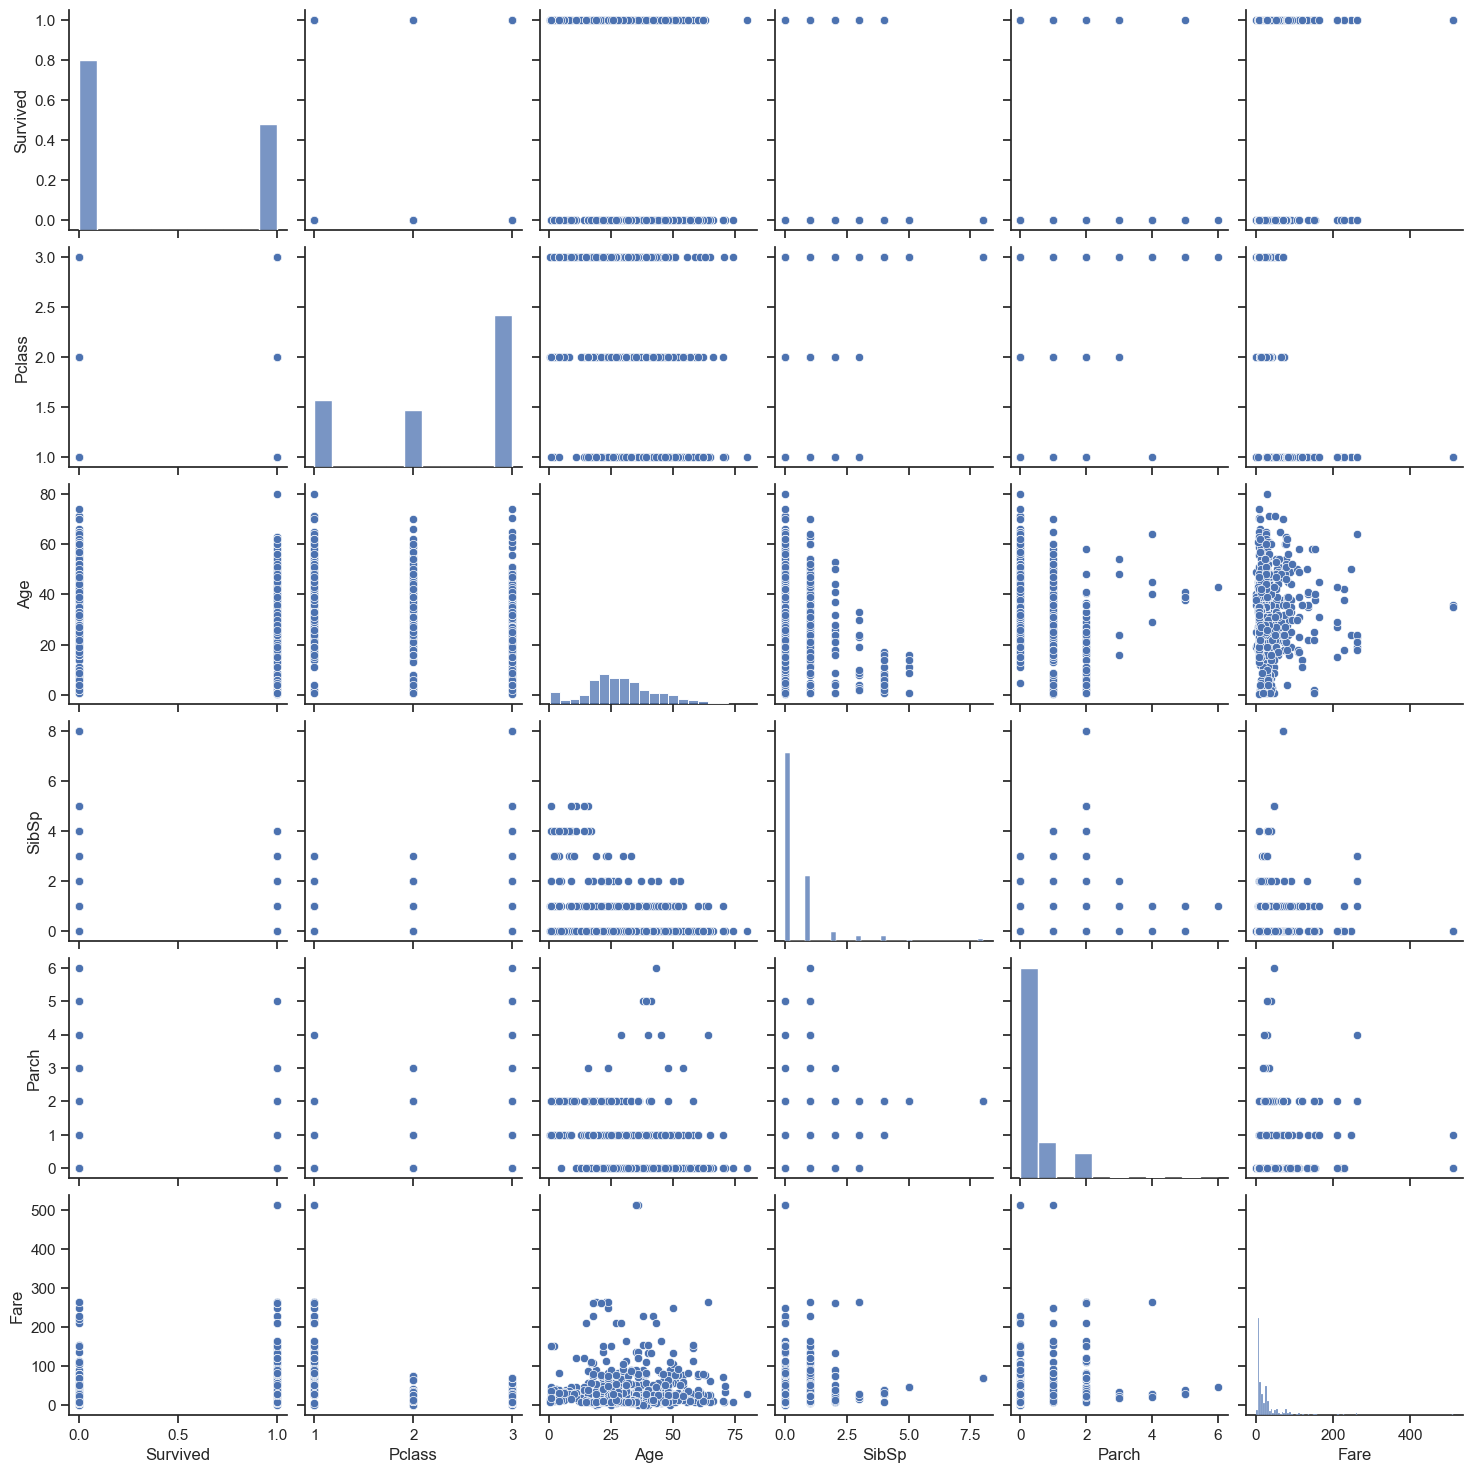

In [40]:
#Матрица графиков рассеивания
sns.set(style="ticks")
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
plt.show()

In [ ]:
#Анализ полученных результатов

""" 
По виду графиков рассеивания можно определись как сильно взаимосвязаны атрибуты (похоже на графическое представление корреляции).

Рассмотрим атрибуты SibSp и Age.На графике видно, что с возрастом пассажиры путешествовали с меньшим количеством родственников.
Теперь рассмотрим атрибуты Age и Fare. Точки на графике расположены почти хаотично (за исключением уменьшения точек с ростом значения
атрибута Fare, но эта зависимость не из-за возраста, а из-за соотношения богачей и бедняков). Получаем, что данные атрибуты 
почти не зависят друг от друга (что подтверждается значением корреляции для них).

"""
 